# Introduction to Machine Learning

In [10]:
#conda install scikit-learn on anaconda/command prompt.

In [11]:
!pip list            #to check for scikit-learn package installed

Package                       Version
----------------------------- --------------------
aiohttp                       3.8.1
aiosignal                     1.2.0
alabaster                     0.7.12
anaconda-client               1.9.0
anaconda-navigator            2.1.4
anaconda-project              0.10.2
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.6.6
astropy                       5.0.4
asttokens                     2.0.5
async-timeout                 4.0.1
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
bea

#Machine learning process: acquire data, clean and format data to be accepted by machine learning model, split the clean data into a test set and a training set, train your model on the training set, test model on the test set, iterate your model and tune your model parameters until it's ready for deployment

#Firstly, you import the model with the general form: from sklearn.family import Model. Model = Estimator object
#Eg. to import linear regression model, from sklearn.linear_model import LinearRegression

#Estimator(Model) parameters: these parameters can be set when it is instantiated and have suitable default values. Use Shift+Tab to check possible parameters
#LinearRegression Model can be instantiated by setting normalize = True in the format below:

#model = LinearRegression(normalize=True), then print(model) you just instantiated.

#Parameters defaulted to the model: LinearRegression(copy_X=True,fit_intercept=True,normalize=True). Once model is created with parameters, fit model on some data.

#Remember split into training set and testing set


#Train your model with the model.fit() method: model.fit(X_train,y_train). Use the trained model to predict labels and values on test set!. This process is for supervised learning.

#predictions = model.predict(X_test) to predict values. Then evaluate model by comparing our predictions to the correct values. This depends on what algorithm is used eg regression, clustering, classification etc

#Scikitlearn Recap: Available in all Estimators(Models)

#1. model.fit(): fit training data

#2. For supervised learning, the training model accepts 2 arguments: data X and labels Y. eg model.fit(X,y)

#3. For unsupervised learning, the training model accepts 1 argument: data X. eg model.fit(X)

#4. For supervised estimator, the trained model predicts the label of a new dataset. It takes 1 argument new data X. eg model.predict(X_new)

#5. For supervised estimator, model.predict_proba() used in classification problems to predict probability that a new observation has each categorical label. The label with highest probability is returned with model.predict()

#6. model.score(): for classification or regression problems for estimators to implement a score(btwn 0 and 1). A larger score indicates a bettr fit.

#7. For unsupervised learning, model.predict() predicts labels in clustering algorithms.

#8. For unsupervised learning, model.transform() transforms new data into the new basis. It accepts one argument X_new and returns new representation of the data based on the unsupervised models.

#9. For unsupervised learning, model.fit_transform() performs a fit and transform on the same input data.

#10.Google scikit-learn algorithm cheat sheet to determine the needed algorithm.

# LINEAR REGRESSION

#House data to create a model to predict house prices based off of existing features.

In [12]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
df = pd.read_csv("C:\\Users\\emman\\USA_Housing.csv")

In [14]:
#call the complete dataset of USA housing.
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [15]:
#check the number of rows and columns of the dataset USA housing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [16]:
#check the first five rows for every house address, price of house, area population where house is
#located, avg.area bedrooms,avg.area rooms,avg. area house age and avg. area income for other
#houses in that area or city where address and price of a house is.

df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [31]:
#describe method to get some statitical information of the dataframe.
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [99]:
#to get individual column names:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [107]:
#to assign a name to the index column
df.index.names = ['index_col']

In [108]:
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
index_col,,,,,,,
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."


In [115]:
#groupby group rows based off a particular column and perform an aggregate function
# df.groupby('Avg. Area Income').describe().transpose()

In [117]:
#df.reset_index()    # to make the index_col(rows) as a column

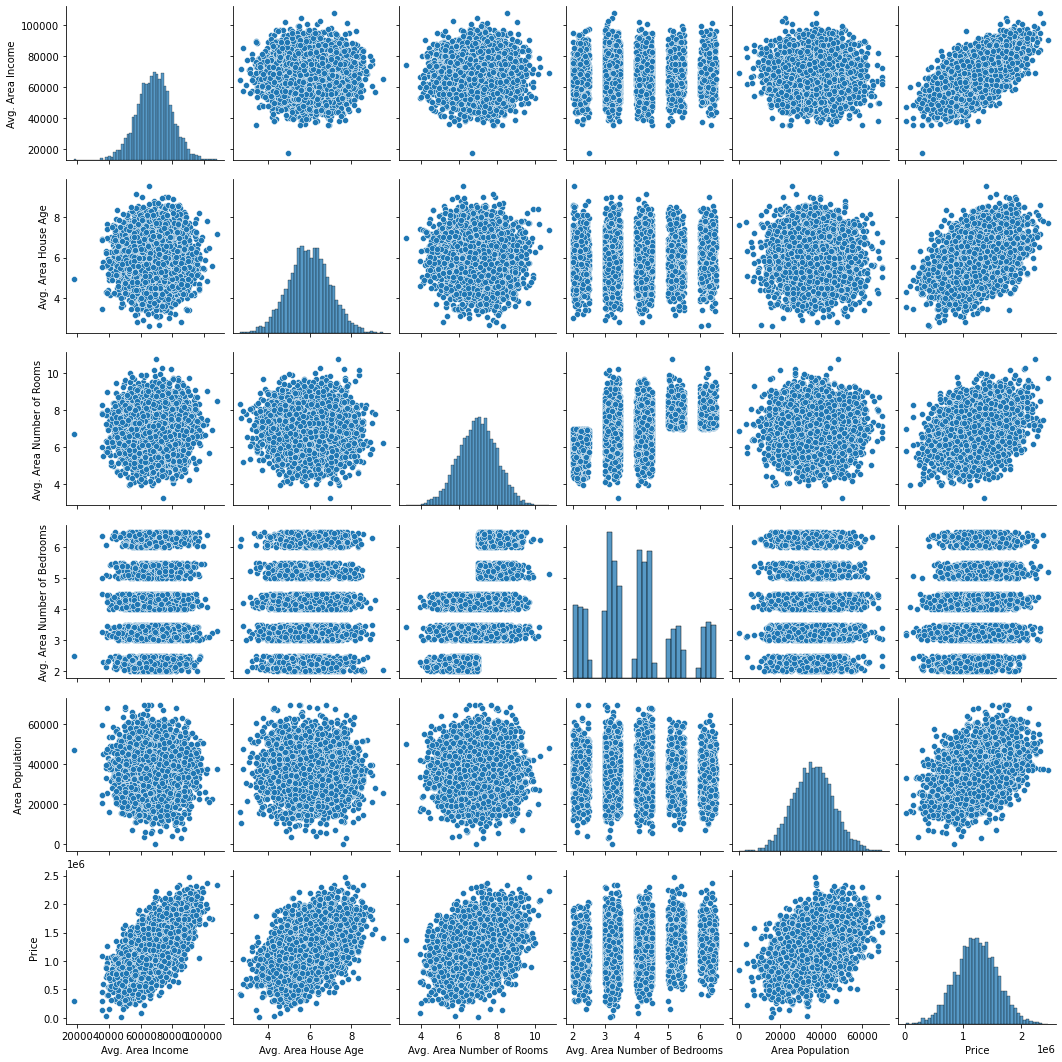

In [110]:
#create a pairplot of the whole dataframe
sns.pairplot(data=df)

C:\Users\emman\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

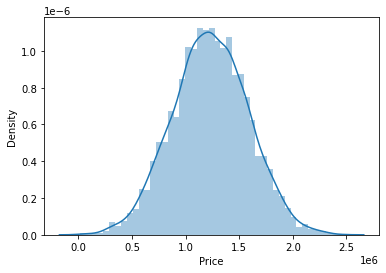

In [111]:
#check distribution plot of what to predict(in this case, it's the price)
#avg price falls btwn 1m-1.5m and it's uniformly distributed
sns.distplot(df['Price'])

<AxesSubplot:xlabel='Price', ylabel='Count'>

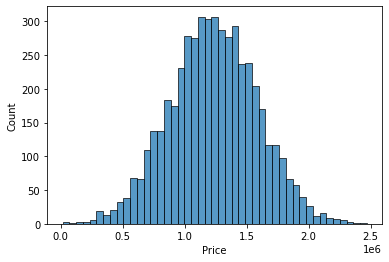

In [112]:
#check histogram plot of the predicted column(Price).
#NB: average price falls between 1m-1.5m because it's a clean data
sns.histplot(df['Price'])

In [113]:
#create a matrix for the data with .corr() method
df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


<AxesSubplot:>

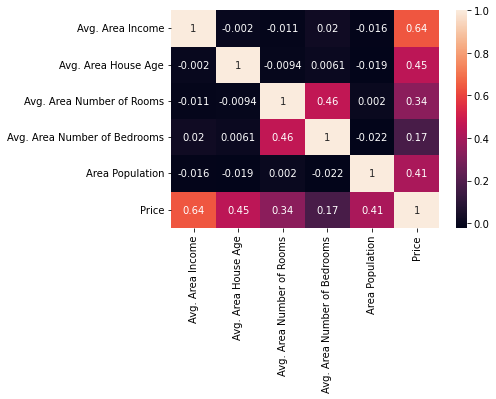

In [114]:
#create a heatmap for the matrix data above
sns.heatmap(df.corr(),annot=True)

In [44]:
#data for our linear regression model: grab X for all columns and y for column to predict
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [97]:
#take X as features
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [98]:
# take y bcos it's to be predicted.
y = df['Price']

#train_test_split for our data to get training set and testing set using scikit learn

#from sklearn.cross_validation import train_test_split is outdated. use this instead:

In [52]:
from sklearn.model_selection import train_test_split

In [57]:
#copy below with shift Tab and paste it. Set test_size=0.4 and random state= 101.
#this splits the data into training sets(X,y) and testing sets(X,y).It's tuple unpacking.
#test size is the % of dataset to be allocated to the test. default = 0.33
#random state is just how random both sets will be selected. default = 42

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [59]:
#create and train the model
from sklearn.linear_model import LinearRegression

In [61]:
#instantiate the model as object
lm = LinearRegression()

In [64]:
#fit the training sets into to instantiated model to train it.
lm.fit(X_train,y_train)

LinearRegression()

In [67]:
#print model intercept
print(lm.intercept_)

-2640159.79685191


In [78]:
#Evalute model to check out coefficent and interpret them: relate to each feature in the dataset
lm.coef_

array([2.15282755e+01, 1.64883282e+05, 1.22368678e+05, 2.23380186e+03,
       1.51504200e+01])

In [79]:
#same as X.columns
X_train.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [80]:
#create a datafram off the coefficients
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])

In [77]:
cdf

,Coefficient
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


#explanation of the above dataframe. when other features are fixed, an increase in any feature results in an increment of the coefficient by the value ascribed in $.

In [95]:
#using real housing prices dataset to get the coefficients increment. FOR KNOWLEDGE
from sklearn.datasets import load_boston

In [96]:
boston = load_boston()

C:\Users\emman\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [84]:
#boston house prices come in dictionary(key/value pairs.)
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [89]:
#print any of the values from the boston.keys() house prices. eg. print(boston['data'])
print(boston['feature_names'])

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [90]:
#for california house prices dataset
from sklearn.datasets import fetch_california_housing

In [91]:
housing = fetch_california_housing()

In [92]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [94]:
print(housing['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

# PART 2 of Linear Regression: Prediction

In [118]:
#to grab prediction for our test sets: pass features our model has not seen before.
predictions = lm.predict(X_test)

In [121]:
#prediction prices of the house
predictions

array([1260960.70567626,  827588.75560352, 1742421.24254328, ...,
        372191.40626952, 1365217.15140895, 1914519.54178824])

In [120]:
#actual prices of the house
y_test

1718    1.251689e+06
2511    8.730483e+05
345     1.696978e+06
2521    1.063964e+06
54      9.487883e+05
            ...     
1776    1.489520e+06
4269    7.777336e+05
1661    1.515271e+05
2410    1.343824e+06
2302    1.906025e+06
Name: Price, Length: 2000, dtype: float64

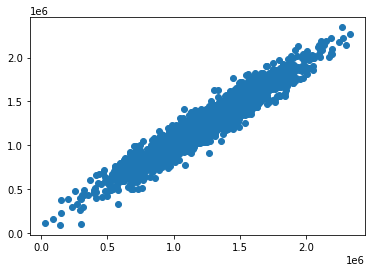

In [182]:
#determine variation of our price predictions from actual price: use scatter plot and transparency
plt.scatter(y_test,predictions,alpha=1)      

#a perfect straightline scatterplot indicates a proper linear regression.

# Residuals

<AxesSubplot:xlabel='Price', ylabel='Count'>

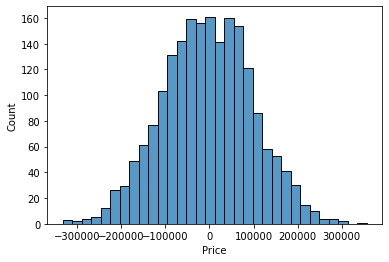

In [136]:
#to get residuals: difference btwn y_test and predictions, use histplot or distplot
sns.histplot((y_test-predictions))

C:\Users\emman\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

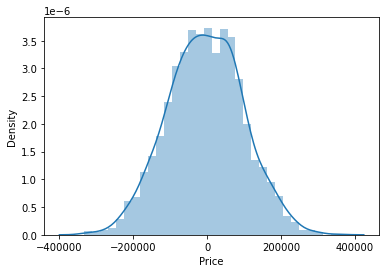

In [137]:
#residuals using distplot
sns.distplot((y_test-predictions))

#Note: distplot above shows it's normally distributed which indicates that linear regression was the right model to be used. If not normally distributed, ensure to use the right model for the data.

# Regression Evaluation Metrics: to minimize errors to create best model.

#MEAN ABSOLUTE ERROR: this is the mean of the absolute values of the errors. Average error and easy to understand.

#MEAN SQUARED ERROR: this is the mean of the squared errors. For larger errors used in real world.

#ROOT MEAN SQUARED ERROR: this is the square root of the mean of the squared errors. 

In [143]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [144]:
mae = mean_absolute_error(y_test,predictions)
mse = mean_squared_error(y_test,predictions)

In [167]:
mae,print('the mean_absolute_error is {}'.format(mae))

the mean_absolute_error is 82288.22251914954


(82288.22251914954, None)

In [165]:
print('the mean_squared_error is',mse)

the mean_squared_error is 10460958907.2095


In [147]:
#root_mean square error: use numpy sqaure root method.
np.sqrt(mse)

102278.82922291152

#this is the same as above, as done on the tutorial.

In [148]:
from sklearn import metrics

In [149]:
metrics.mean_absolute_error(y_test,predictions)

82288.22251914954

In [150]:
mean_squared_error(y_test,predictions)

10460958907.2095

In [151]:
np.sqrt(mean_squared_error(y_test,predictions))

102278.82922291152

# Linear Regression Exercise and Solution

#You got a contract work with an Ecommerce company based in NewYork that sells clothing online and have an in-store style and clothing advice session. Customers come to the store for advice sessions with personal stylist, then go home to decide if to order clothes from company's mobile app or website.

#The company needs to decide whether to focus more attention on either the mobile app or the website. Your job is to make the best decision. 

In [1]:
#import python libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
#Read in the Ecommerce Customers csv file as a DataFrame called customers

customers = pd.read_csv("C:\\Users\\emman\\Ecommerce Customers.csv")

In [4]:
customers

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [5]:
#check the head of customers.

customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [7]:
#check the info of customers.

customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [9]:
#check the describe method for statistical information of customers.

customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [10]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

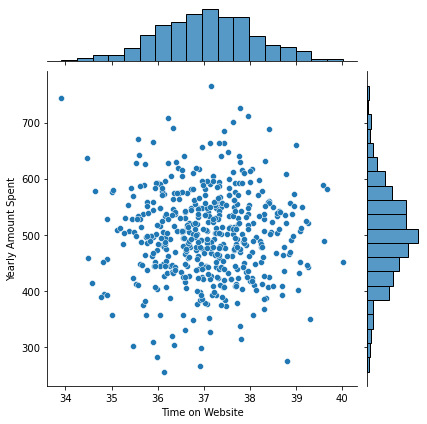

In [11]:
#Use seaborn to create a jointplot to compare time on website and yearly amount spent columns.

sns.jointplot(data=customers,x='Time on Website',y='Yearly Amount Spent')

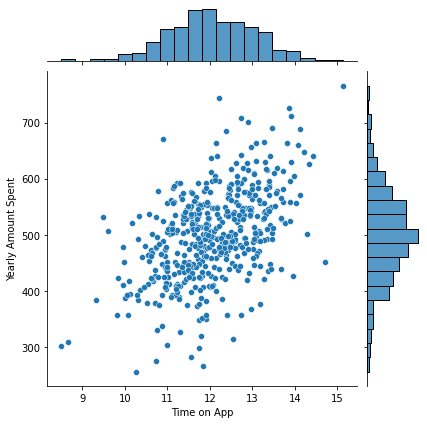

In [12]:
#Use seaborn to create a jointplot to compare time on app and yearly amount spent columns.

sns.jointplot(data=customers,x='Time on App',y='Yearly Amount Spent')

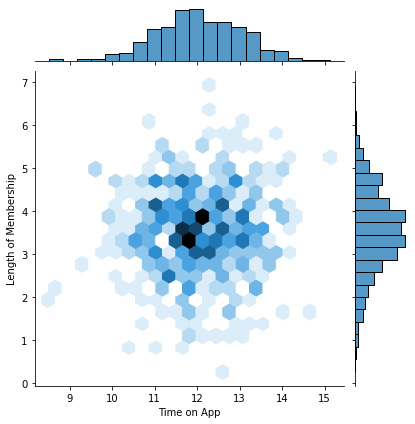

In [15]:
#Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.

sns.jointplot(data=customers,x='Time on App',y='Length of Membership',kind='hex')

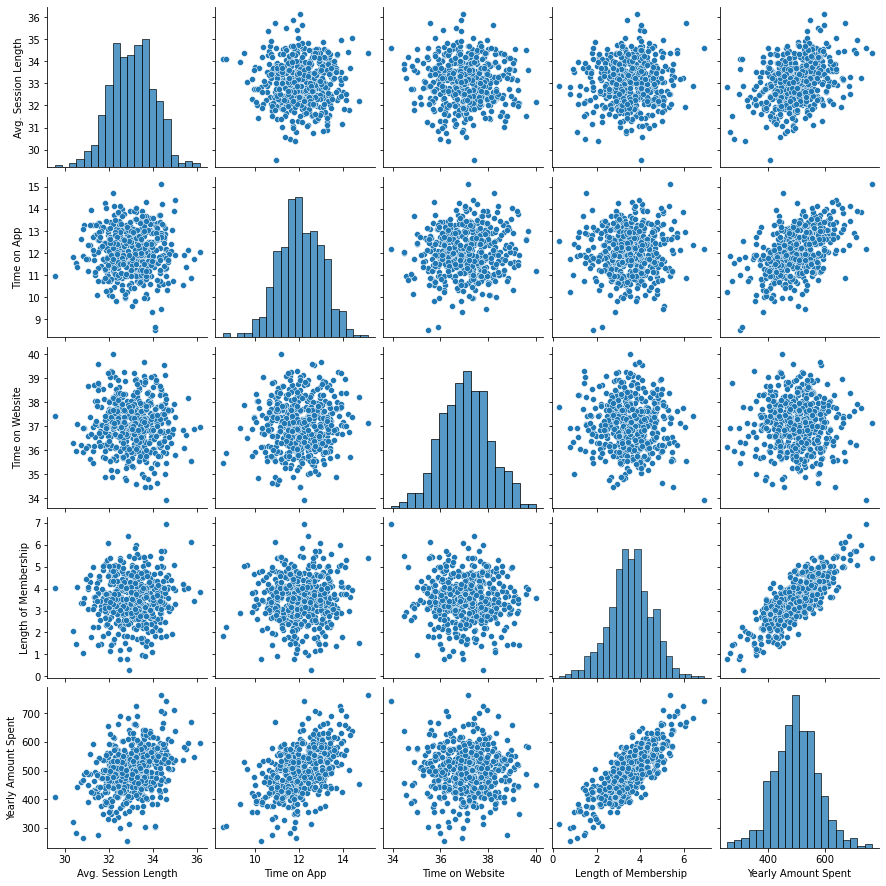

In [19]:
#create a pairplot of the entire dataset. Length of Membership gives most correlation with Yearly Amount Spent

sns.pairplot(customers)

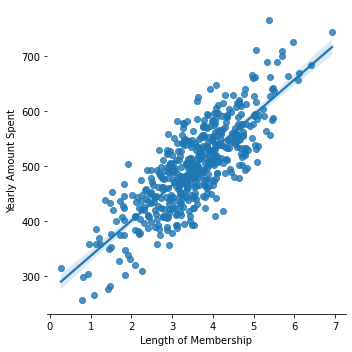

In [21]:
#create a linear model(lm) plot of Yearly Amount Spent versus Length of Membership.

sns.lmplot(data=customers,y='Yearly Amount Spent',x='Length of Membership')
#to remove the left line
sns.despine(left=True)

#create a training and testing data. set X to numerical features of customers and y to 'Yearly Amount Spent' column.

In [23]:
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [24]:
y = customers['Yearly Amount Spent']

#Use cross_validation/model selection train_test_split from sklearn to split the data into training and testing set. Set test_size=0.3 and random state=101

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

#Train the model: import Linear Regression from sklearn.linear_model

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
#create and instance of a LinearRegression() model called lm

lm = LinearRegression()

In [31]:
#Train and fit lm on the training data

lm.fit(X_train,y_train)

LinearRegression()

In [33]:
#Print out the coefficients of the model

print(lm.coef_)

[25.98154972 38.59015875  0.19040528 61.27909654]


#Predicting Test Data

In [35]:
#Use lm.predict to predict off the X_test set of the data

predictions = lm.predict(X_test)

In [36]:
predictions

array([456.44186104, 402.72005312, 409.2531539 , 591.4310343 ,
       590.01437275, 548.82396607, 577.59737969, 715.44428115,
       473.7893446 , 545.9211364 , 337.8580314 , 500.38506697,
       552.93478041, 409.6038964 , 765.52590754, 545.83973731,
       693.25969124, 507.32416226, 573.10533175, 573.2076631 ,
       397.44989709, 555.0985107 , 458.19868141, 482.66899911,
       559.2655959 , 413.00946082, 532.25727408, 377.65464817,
       535.0209653 , 447.80070905, 595.54339577, 667.14347072,
       511.96042791, 573.30433971, 505.02260887, 565.30254655,
       460.38785393, 449.74727868, 422.87193429, 456.55615271,
       598.10493696, 449.64517443, 615.34948995, 511.88078685,
       504.37568058, 515.95249276, 568.64597718, 551.61444684,
       356.5552241 , 464.9759817 , 481.66007708, 534.2220025 ,
       256.28674001, 505.30810714, 520.01844434, 315.0298707 ,
       501.98080155, 387.03842642, 472.97419543, 432.8704675 ,
       539.79082198, 590.03070739, 752.86997652, 558.27

Text(0, 0.5, 'Predicted Values')

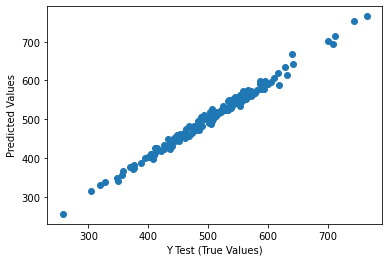

In [38]:
#create a scatter plot of the real test value versus the predicted values

plt.scatter(y_test,predictions)
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted Values')

#Evaluate the Model

In [43]:
#Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [53]:
#Mean Absolute Error

mae = mean_absolute_error(y_test,predictions)

In [54]:
mae

7.228148653430832

In [55]:
#Mean Squared Error

mse = mean_squared_error(y_test,predictions)

In [56]:
mse

79.81305165097444

In [57]:
#Root Mean Square Error

rmse = np.sqrt(mse)

In [51]:
rmse

8.933815066978633

In [58]:
from sklearn import metrics

In [62]:
print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 7.228148653430832
MSE: 79.81305165097444
RMSE: 8.933815066978633


In [63]:
#Explain variance score

metrics.explained_variance_score(y_test,predictions)

0.9890771231889607

C:\Users\emman\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Density'>

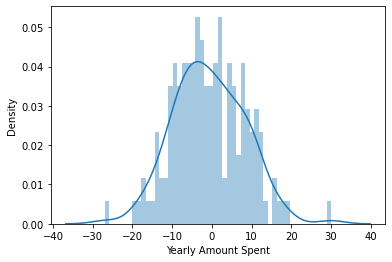

In [66]:
#Residuals: use sns.distplot or plt.hist()

sns.distplot(y_test-predictions,bins=50)

In [70]:
#Recreate a dataframe with the coefficients

cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])

In [71]:
cdf

,Coeff
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


#Conclusion: since there are more increment for the time on app than time on website, a good business decision of cost would determine which is better to focus on.

# LOGISTIC REGRESSION

#Logistic regression is used to solve classification problems. Classification is a machine learning problem to determine which of a set of categories a new observation belongs to based off a training data. Eg: detect spam vs Ham emails, detect a loan default(yes or no), disease diagnosis(someone has a cancer or not). This type of classification is called a Binary clasification(2 classes)

#Logistics regression helps to solve classification problems where we predict discrete categories. The convention for Binary classification is to have 2 classes(0 and 1).

#logistic regression curve is between 0 and 1. Put the linear model into the logistic model to output between 0 and 1

#Assign a class(line) at 0.5 between 0 and 1. Anything below 0.5 is class 0 and anything above 0.5 is class 1.

#Use confusion matrix: True positive = predicted YES and actual YES, True Negative = predicted NO and actual NO, False Positive = predicted YES and actual NO, False Negative = predicted NO and actual YES.

#Accuracy Rate = (TP + TN)/Total. to find how often is the model correct. TP is type I right, TN is type II right.

#Misclassification Rate = (FP + FN)/Total. to find how often is the model wrong. FP is type I error, FN is type II error

# Titanic dataset Prediction of survivors and deceased

In [123]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [124]:
titanic_train = pd.read_csv("C:\\Users\\emman\\titanic dataset\\titanic_train.csv")

In [125]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#above dataset: Survived:0-didn't survive, 1-survived, Pclass:passenger class on the ship, SibSp: number of siblings/spouse onboard, Parch: number of parent/children onbaord, Fare: how much paid for ticket, Cabin: rooms lodged in, Embarked: embark_town(S-southampton, C-Cherbourg, Q-Queenstown)

In [126]:
#use method isnull() to find missing values. Gives a boolean of True or False. True-a NaN, False-no NaN

titanic_train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

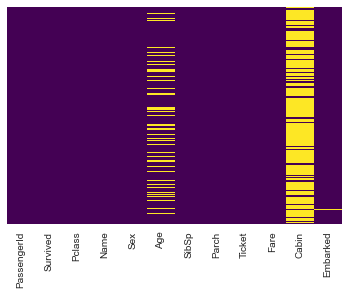

In [127]:
#create a heatmap of the data.

sns.heatmap(titanic_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#NB:the yellow dash on Age and Cabin of the above heatmap indicates the NaN present(True point). There are lots of missing data in both columns

In [128]:
#Exploratory data analysis: set style. Use any favorite style of choice.

sns.set_style('whitegrid')

<AxesSubplot:xlabel='Survived', ylabel='count'>

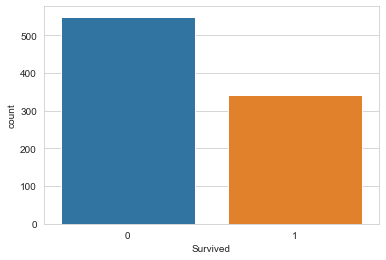

In [129]:
#to count who survived and who did not survive: less people survived than deceased.

sns.countplot(data=titanic_train,x='Survived')

<AxesSubplot:xlabel='Survived', ylabel='count'>

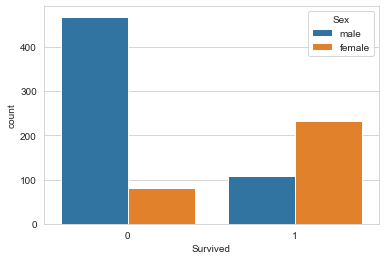

In [130]:
#to count who survived and who did not survive based on sex: more males died and more female survived.

sns.countplot(data=titanic_train,x='Survived',hue='Sex')

<AxesSubplot:xlabel='Survived', ylabel='count'>

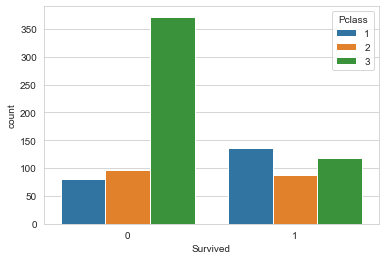

In [131]:
#to count who suvived and who did not survived based on Passenger class.

sns.countplot(data=titanic_train,x='Survived',hue='Pclass')

C:\Users\emman\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Age'>

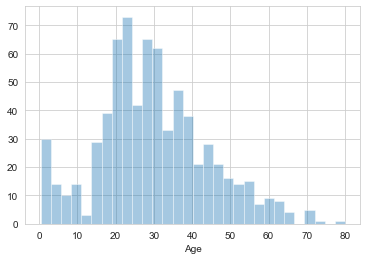

In [132]:
#to get the age of people on the titanic using sns.distplot.dropna to remove the Nan

sns.distplot(titanic_train['Age'].dropna(),kde=False,bins=30)

<AxesSubplot:ylabel='Frequency'>

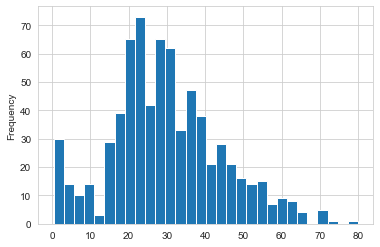

In [133]:
#to get the age of people on the titanic using pandas plot

titanic_train['Age'].plot.hist(bins=30)

In [134]:
from plotly.offline import download_plotlyjs,init_notebook_mode,iplot,plot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

In [135]:
titanic_train['Age'].iplot(kind='hist')    #use plotly and cufflinks to find the age as above solutions.

In [136]:
#to get info

titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

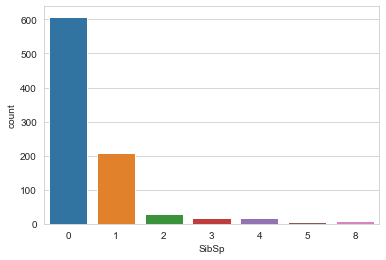

In [137]:
#to count number of sibling/spouse on board..

sns.countplot(data=titanic_train,x='SibSp')

<AxesSubplot:ylabel='Frequency'>

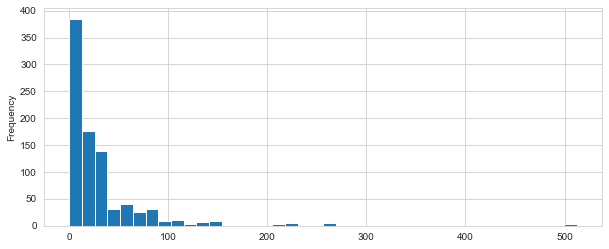

In [138]:
#explore the fare column with pandas plot

titanic_train['Fare'].plot.hist(bins=40,figsize=(10,4))

In [139]:
titanic_train['Fare'].iplot(kind='hist',bins=40)   #same as above but with plotly and cufflinks

# Logistic Regression Part 2: Cleaning the data

#Cleaning the data allows transformation of data into an acceptable form for machine learning algorithms. In this case, we are working on missing values of Age and Cabin.

#Instead of dropping the missing values in age, we can fill the mean age of all passengers based off their class. This is known as imputation.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

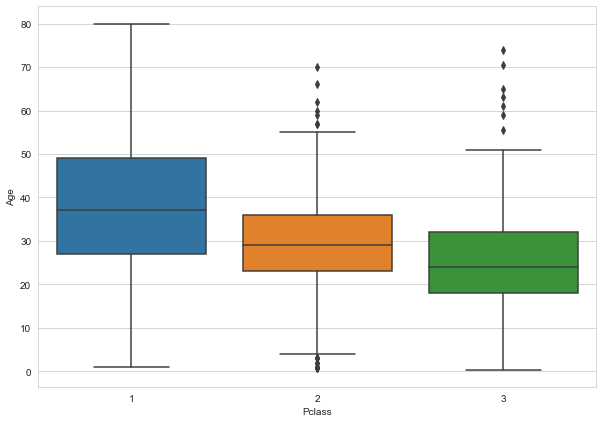

In [140]:
#create a boxplot of age and pclass using seaborn
plt.figure(figsize=(10,7))
sns.boxplot(data=titanic_train,x='Pclass',y='Age')

In [141]:
def impute_age(cols):           #function was defined to fill the age column based of ages of passengers in each class
    Age = cols[0]                                
    Pclass = cols[1]
    if pd.isnull(Age):            
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [142]:
titanic_train['Age'] = titanic_train[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

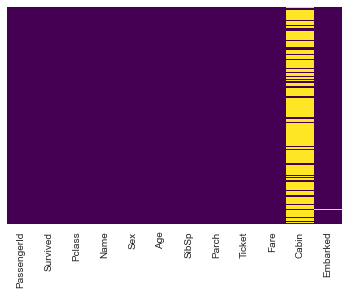

In [143]:
#check with heatmap to verify if Age column has no missing information

sns.heatmap(titanic_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [144]:
#Cabin clumn can be dropped/deleted because it has many missing information

titanic_train.drop('Cabin',axis=1,inplace=True)

In [145]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

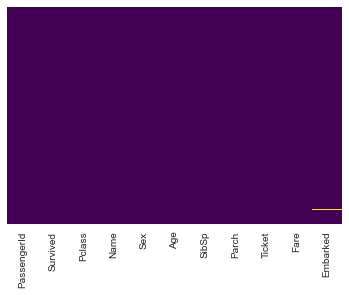

In [146]:
#check with heatmap to verify if Cabin column has been dropped

sns.heatmap(titanic_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [147]:
#to drop missing value in Embarked

titanic_train.dropna(inplace=True)

<AxesSubplot:>

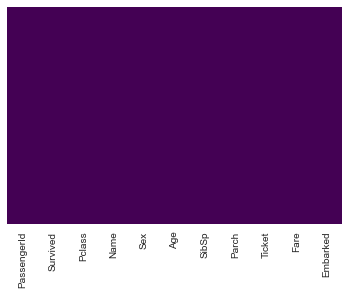

In [148]:
#check with heatmap to verify if Emabrked column has no missing information

sns.heatmap(titanic_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [149]:
#to get dummies for categorical columns sex and embarked because ML algorithms cannot read alphabeths

sex = pd.get_dummies(titanic_train['Sex'],drop_first=True)

In [150]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [151]:
embark = pd.get_dummies(titanic_train['Embarked'],drop_first=True)

In [152]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [155]:
#to concatenate the dummies with the main dataset for ml algorithm

titanic_train = pd.concat([titanic_train,sex,embark],axis=1)

In [156]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [157]:
#we drop columns that will not fit into our algorithms

titanic_train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [158]:
titanic_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [159]:
#drop PassengerId because it just shows the index of everypne onboard.

titanic_train.drop('PassengerId',axis=1,inplace=True)

In [160]:
titanic_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


#Logistic Regression Part 3: Predict who survived or not based off classes

In [161]:
titanic_train.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S'],
      dtype='object')

In [162]:
#to get the features: also use X = titanic_train.drop('Survived',axis=1)

X = titanic_train[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S']]

In [164]:
#label to be predicted

y = titanic_train['Survived']   

In [165]:
from sklearn.model_selection import train_test_split

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [173]:
#to create a model for prediction

from sklearn.linear_model import LogisticRegression

In [174]:
#create an instance/
estimator object of the model

logmodel = LogisticRegression()

In [175]:
logmodel.fit(X_train,y_train)

C:\Users\emman\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [176]:
predictions = logmodel.predict(X_test)

In [177]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

#Evaluate the model

In [178]:
from sklearn.metrics import classification_report

In [179]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       163
           1       0.82      0.71      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.81       267
weighted avg       0.83      0.83      0.83       267



In [180]:
from sklearn.metrics import confusion_matrix

In [181]:
confusion_matrix(y_test,predictions)

array([[147,  16],
       [ 30,  74]], dtype=int64)

# Logistic Regression Exercise and Solutions

#In this project, we work with a fake advertisement dataset, indicating whether or not a particular internet user clicked on an advertisement.We will create a model to determine whether or not they will click on ads based off the features of that user.

In [182]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [183]:
#Read the advertising.csv file and set it to a dataframe ad_data

ad_data = pd.read_csv("C:\\Users\\emman\\advertising.csv")

In [184]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [185]:
#use info and describe on ad_dad_data

ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [186]:
ad_data.describe()          #statistical description

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


#Exploratory Data Analysis

<AxesSubplot:xlabel='Age', ylabel='Count'>

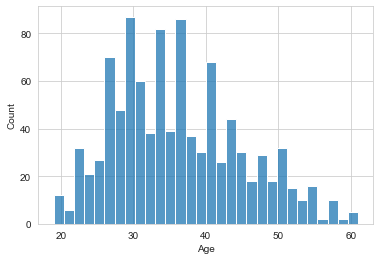

In [192]:
#create a histogram of the Age

sns.histplot(data=ad_data,x='Age',bins=30)

<AxesSubplot:ylabel='Frequency'>

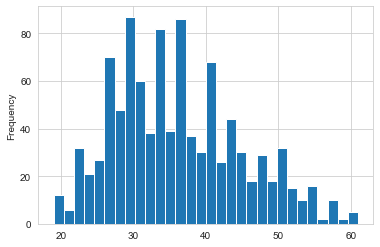

In [193]:
#pandas plot for the above question

ad_data['Age'].plot.hist(bins=30)

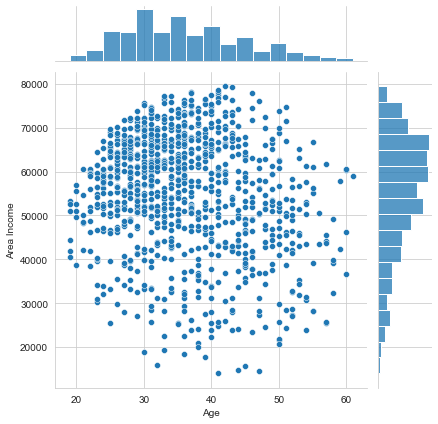

In [194]:
#create a jointplot showing Area Income versus Age

sns.jointplot(data=ad_data,x='Age',y='Area Income')

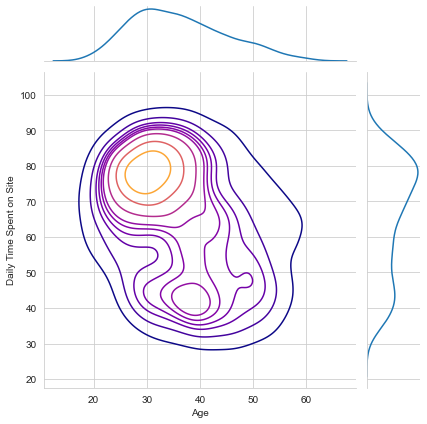

In [201]:
#create a kde jointplot showing Daily Time spent on Site versus Age

sns.jointplot(data=ad_data,x='Age',y='Daily Time Spent on Site',kind='kde',cmap='plasma')

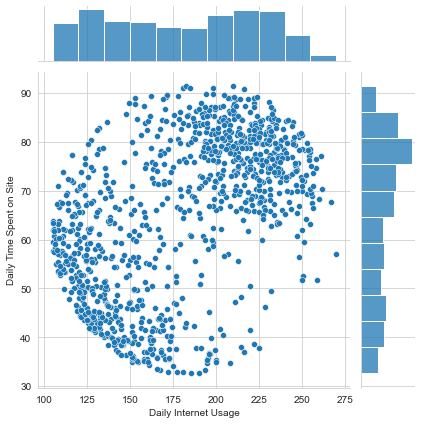

In [202]:
#create a jointplot showing Daily Time spent on Site versus Daily Internet Usage

sns.jointplot(data=ad_data,x='Daily Internet Usage',y='Daily Time Spent on Site')

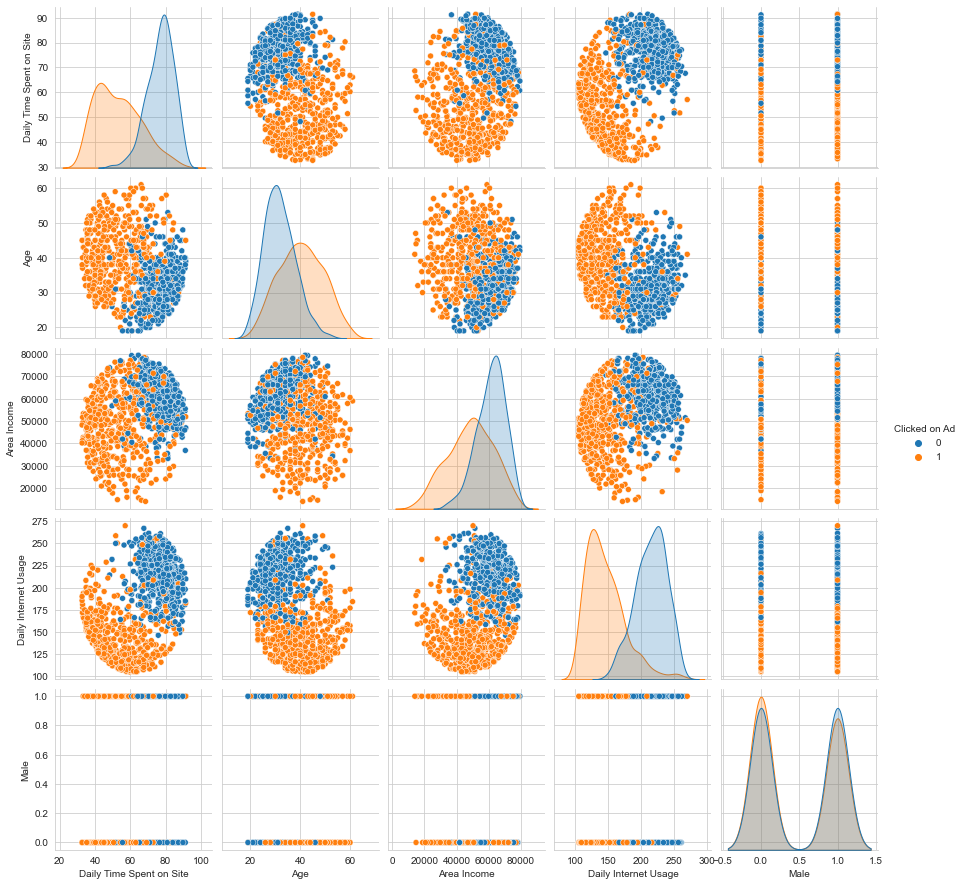

In [203]:
#create a pairplot with the hue defined by the Clicked on Ad column feature

sns.pairplot(data=ad_data,hue='Clicked on Ad')

In [204]:
ad_data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [205]:
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage','Male']]
y = ad_data['Clicked on Ad']

In [206]:
from sklearn.model_selection import train_test_split

In [207]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

#train and fit regression model on a training set

In [208]:
from sklearn.linear_model import LogisticRegression

In [209]:
logR = LogisticRegression()

In [210]:
logR.fit(X_train,y_train)

LogisticRegression()

#Predict values for the testing data and Evaluate

In [211]:
predictions = logR.predict(X_test)

#create a classification report and confusion matrix for the model

In [212]:
from sklearn.metrics import classification_report

In [213]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [214]:
from sklearn.metrics import confusion_matrix

In [215]:
print(confusion_matrix(y_test,predictions))

[[149   8]
 [ 14 129]]
